## import Libraries

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
%matplotlib inline
import warnings
color_palette=sns.color_palette
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

## Read Data

In [61]:
df=pd.read_csv('D:\MLdatasets\laptops_cleaned.csv')

In [62]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [63]:
df.head()

,price,Category,Inch,Core,Processor,Ram,Memory,Opysys
0,"1,799",HUAWEI,15.6-Inch,Core i5,-1155G,8GB,256GB SSD,Windows 11
1,"2,399",HUAWEI,NaN,Core i5,-12450H,16GB,512GB SSD,Windows 11
2,"2,599",HUAWEI,14-Inch,Core i5,-1240P,16GB,512GB SSD,Windows 11
3,"3,099",HUAWEI,NaN,Core i7,-13700H,16GB,1TB SSD,Windows 11
4,"2,599",HUAWEI,NaN,Core i5,-13420H,16GB,1TB SSD,Windows 11


## Explore Data

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   price      863 non-null    object
 1   Category   863 non-null    object
 2   Inch       465 non-null    object
 3   Core       609 non-null    object
 4   Processor  570 non-null    object
 5   Ram        819 non-null    object
 6   Memory     734 non-null    object
 7   Opysys     348 non-null    object
dtypes: object(8)
memory usage: 54.1+ KB


In [65]:
df.dtypes

price        object
Category     object
Inch         object
Core         object
Processor    object
Ram          object
Memory       object
Opysys       object
dtype: object

## Data Cleaning

In [66]:
#change datatype of price
df['price']=df['price'].str.replace(',','')
df['price']=df['price'].astype('float')

In [67]:
df['price']

0       1799.0
1       2399.0
2       2599.0
3       3099.0
4       2599.0
        ...   
858     3099.0
859     3549.0
860     3399.0
861     1999.0
862    16499.0
Name: price, Length: 863, dtype: float64

In [68]:
df['Inch'].unique()

array(['15.6-Inch', nan, '14-Inch', '12.6-Inch', '13-Inch', '10.5-Inch',
       '8.8-Inch', '16-Inch', '15.6 Inch', '14 Inch', '17.3-Inch',
       '12-Inch', '16.1-Inch', '13 Inch', '15-Inch', '23.8-Inch',
       '12.4-Inch', '14.5-Inch', '14.4-Inch', '13.3 Inch', '13.6-Inch',
       '16 Inch', '17-Inch', '14.2-Inch', '13.3-Inch', '13.5-Inch',
       '14.5 Inch', '11.6-Inch', '14.0 Inch', '13.9 Inch', '12.3 Inch',
       '14.0-Inch', '12.3-Inch', '11.6 Inch', '16.0 Inch', '4 Inch'],
      dtype=object)

In [69]:
df['Inch']=df['Inch'].str.replace('-Inch','').str.replace(' Inch','')

In [72]:
df['Inch']

0      15.6
1       NaN
2        14
3       NaN
4       NaN
       ... 
858    15.6
859     NaN
860      14
861      14
862     NaN
Name: Inch, Length: 863, dtype: object

In [73]:
df['Core'].unique()

array(['Core i5', 'Core i7', 'Core i9', nan, 'Core i3', 'Intel Core i5',
       'Intel Core i7', 'Intel Core i3', 'Intel Core\xa0i7',
       'Intel Core i9', 'Core\xa0i7', 'Core\xa0i5', 'Intel\xa0Core\xa0i5',
       'Intel\xa0Core\xa0i7'], dtype=object)

In [74]:
df['Core']=df['Core'].str.replace('\xa0','')

In [95]:
df['Core']=df['Core'].str.replace('Intel','')

In [100]:
df['Core']=df['Core'].str.replace(' Core i7','Core i7').str.replace(' Core i9','Core i9').str.replace(' Core i3','Core i3').str.replace('Corei5',' Core i5').str.replace('Corei7','Core i7').str.strip()

In [101]:
df['Core'].unique()

array(['Core i5', 'Core i7', 'Core i9', nan, 'Core i3'], dtype=object)

In [81]:
df['Processor'].unique()

array(['-1155G', '-12450H', '-1240P', '-13700H', '-13420H', '-13900H',
       '-1260P', nan, '-5625U', '-1355U', '-1135G', '-1315U', '-12700H',
       '-1335U', '-12650H', '-1215U', '-1255U', '-1360P', '-1235U',
       '-5700U', '-13620H', '-6800H', '-11800H', '-12500H', '-1035G',
       '-1115G', '-1305U', '-1280P', '-13650H', '-7840H', '-1334U',
       '-7730U', '-5825U', '-1165G', '-3250U', '-1245U', '-14650H',
       '-13500H', '-13980H', '-5500H', '-14900H', '-7520U', '-5500U',
       '-11370H', '-1005G', '-7530U', '-8940H', '-14700H', '-5800H',
       '-7735H', '-7945H', '-10210U', '-12900H', '-7940H', '-13450H',
       '-8840H', '-5600U', '-8265U', '-8550U', '-1195G', '-11400H',
       '-10510U', '-1250U', '-1185G', '-8665U', '-1265U', '-1160G',
       '-1125G', '-10110U', '-4500U', '-1065G', '-8250U'], dtype=object)

In [82]:
df['Ram'].unique()

array(['8GB', '16GB', '4GB', '256GB', '512GB', '32GB', '18GB', '36GB',
       nan, '64GB', '2GB', '48GB', '12GB'], dtype=object)

In [83]:
df['Memory'].unique()

array(['256GB SSD', '512GB SSD', '1TB SSD', '128GB SSD', nan, '2TB SSD',
       '265GB SSD', '512GB\xa0SSD'], dtype=object)

In [103]:
df['Memory']=df['Memory'].str.replace('SSD','').str.replace('265GB ','256GB ').str.strip().str.replace('\xa0','')

In [104]:
df['Memory'].unique()

array(['256GB', '512GB', '1TB', '128GB', nan, '2TB'], dtype=object)

In [87]:
df['Opysys']=df['Opysys'].str.replace('\xa0','')

In [92]:
df['Opysys']=df['Opysys'].str.replace('Windows 11','Windows11')

In [172]:
df.loc[df['Category'] == 'Apple', 'Opysys']='Mac ops'

In [175]:
df

,price,Category,Inch,Core,Processor,Ram,Memory,Opysys
0,1799.0,HUAWEI,15.6,Core i5,-1155G,8GB,256GB,Windows11
1,2399.0,HUAWEI,NaN,Core i5,-12450H,16GB,512GB,Windows11
2,2599.0,HUAWEI,14,Core i5,-1240P,16GB,512GB,Windows11
3,3099.0,HUAWEI,NaN,Core i7,-13700H,16GB,1TB,Windows11
4,2599.0,HUAWEI,NaN,Core i5,-13420H,16GB,1TB,Windows11
...,...,...,...,...,...,...,...,...
858,3099.0,Lenovo,15.6,NaN,NaN,NaN,NaN,Windows 10
859,3549.0,Lenovo,NaN,Core i5,-1335U,8GB,512GB,NaN
860,3399.0,Lenovo,14,Core i5,NaN,8GB,256GB,NaN
861,1999.0,HUAWEI,14,Core i5,-1155G,8GB,512GB,Windows11


## EDA

### univariate analysis

In [23]:
df.columns

Index(['price', 'Category', 'Inch', 'Core', 'Processor', 'Ram', 'Memory',
       'Opysys'],
      dtype='object')

In [106]:
fig = px.histogram(df, x='price', title='Distribution of Price', nbins=10,color_discrete_sequence=['purple'])


fig.show()

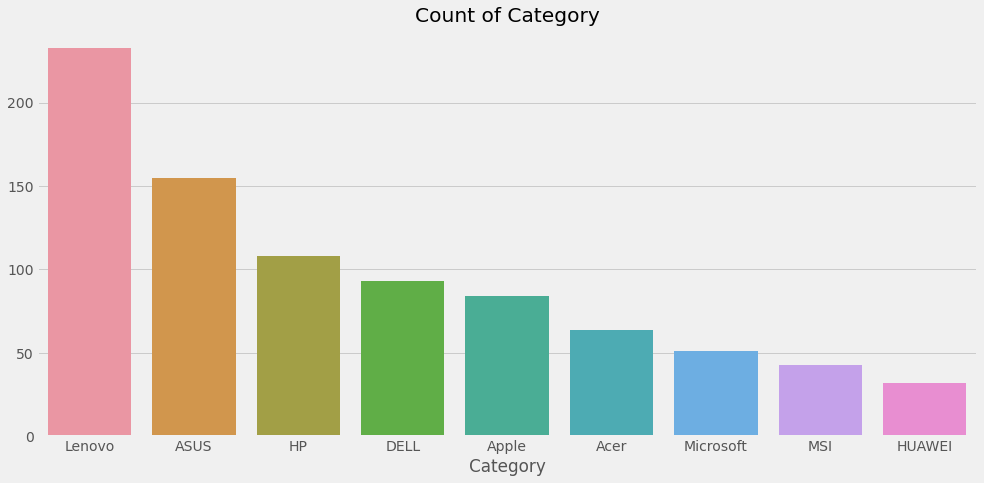

In [135]:
plt.figure(figsize=(15,7))
Categories=df['Category'].value_counts().sort_values(ascending=False)
plt.title(f'Count of Category')
sns.barplot(x=Categories.index, y=Categories.values)
plt.show()

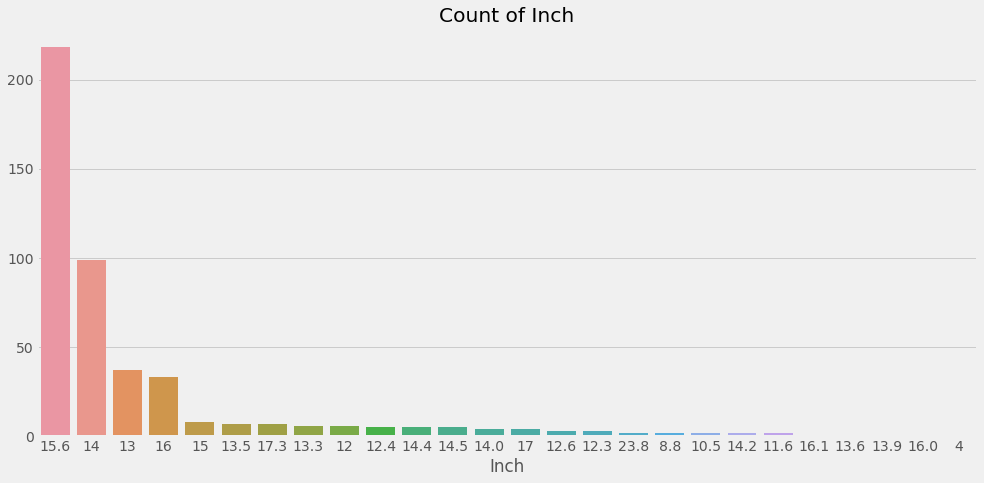

In [136]:
plt.figure(figsize=(15,7))
Inch=df['Inch'].value_counts().sort_values(ascending=False)
plt.title(f'Count of Inch')
sns.barplot(x=Inch.index, y=Inch.values)
plt.show()

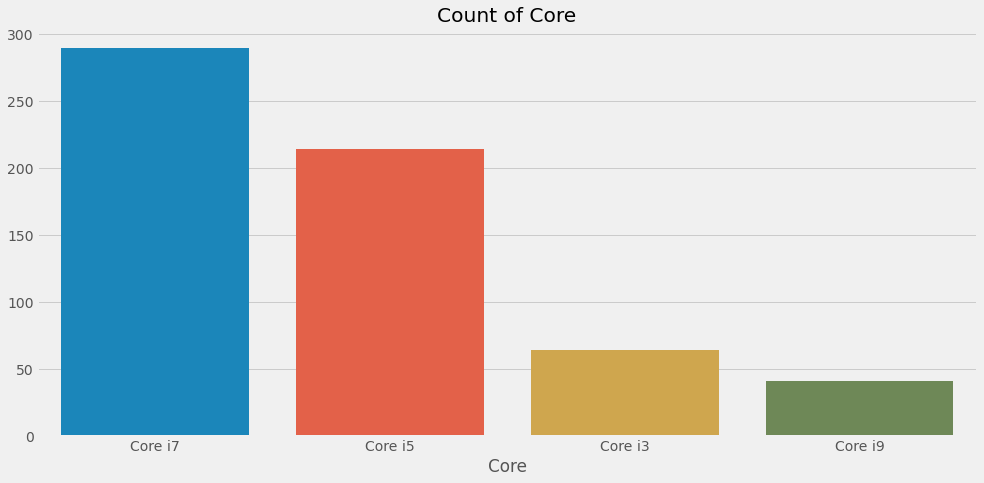

In [137]:
plt.figure(figsize=(15,7))
Core=df['Core'].value_counts().sort_values(ascending=False)
plt.title(f'Count of Core')
sns.barplot(x=Core.index, y=Core.values)
plt.show()

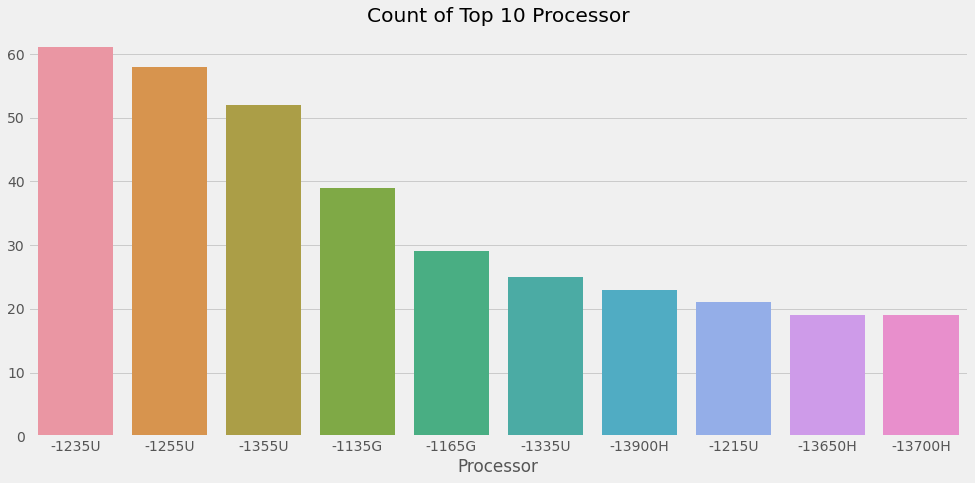

In [138]:
plt.figure(figsize=(15,7))
Processor=df['Processor'].value_counts().sort_values(ascending=False)[:10]
plt.title(f'Count of Top 10 Processor')
sns.barplot(x=Processor.index, y=Processor.values)
plt.show()

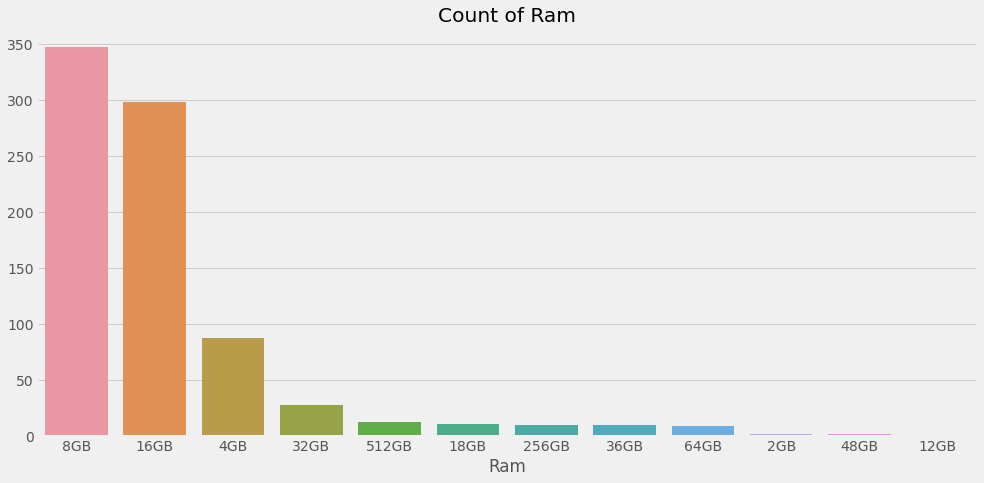

In [139]:
plt.figure(figsize=(15,7))
Ram=df['Ram'].value_counts().sort_values(ascending=False)
plt.title(f'Count of Ram')
sns.barplot(x=Ram.index, y=Ram.values)
plt.show()

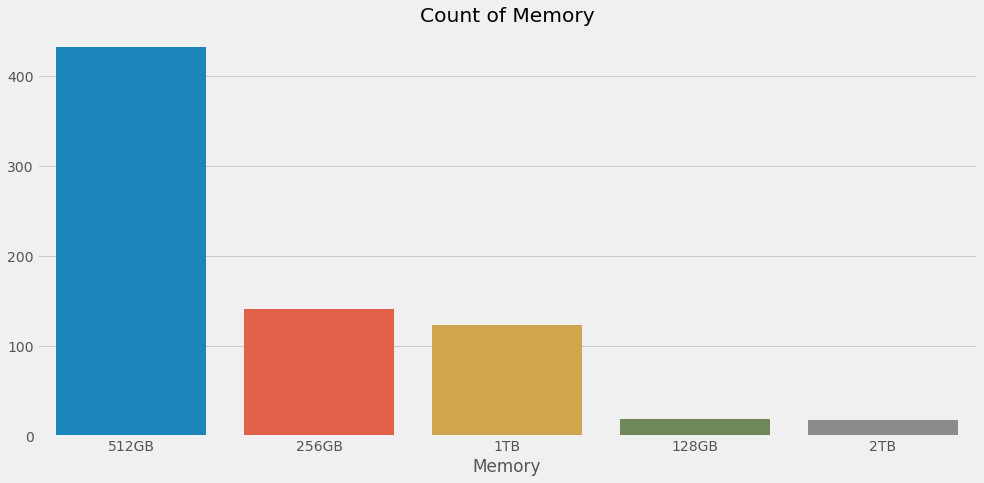

In [140]:
plt.figure(figsize=(15,7))
Memory=df['Memory'].value_counts().sort_values(ascending=False)
plt.title(f'Count of Memory')
sns.barplot(x=Memory.index, y=Memory.values)
plt.show()

### bivariate analysis

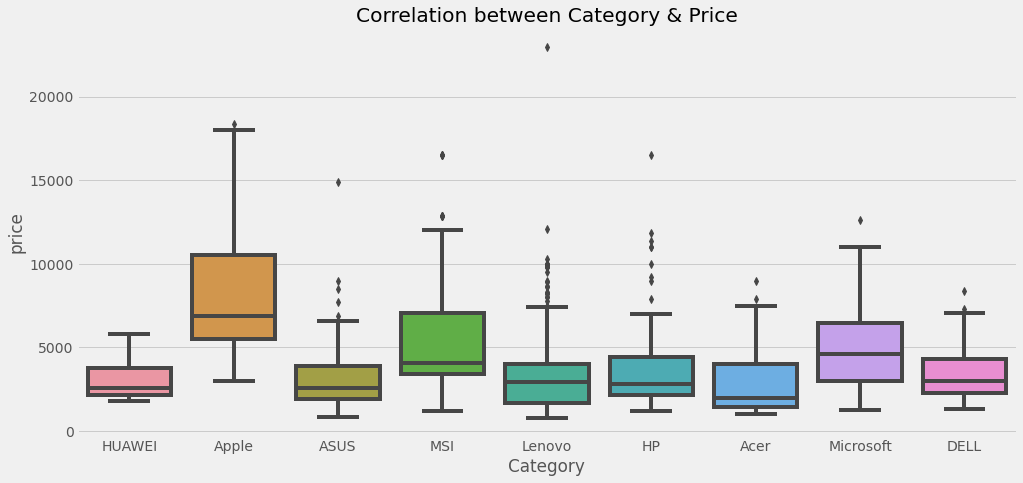

In [141]:
plt.figure(figsize=(15,7))
plt.title('Correlation between Category & Price')
sns.boxplot(data=df,x='Category',y='price')
plt.show()

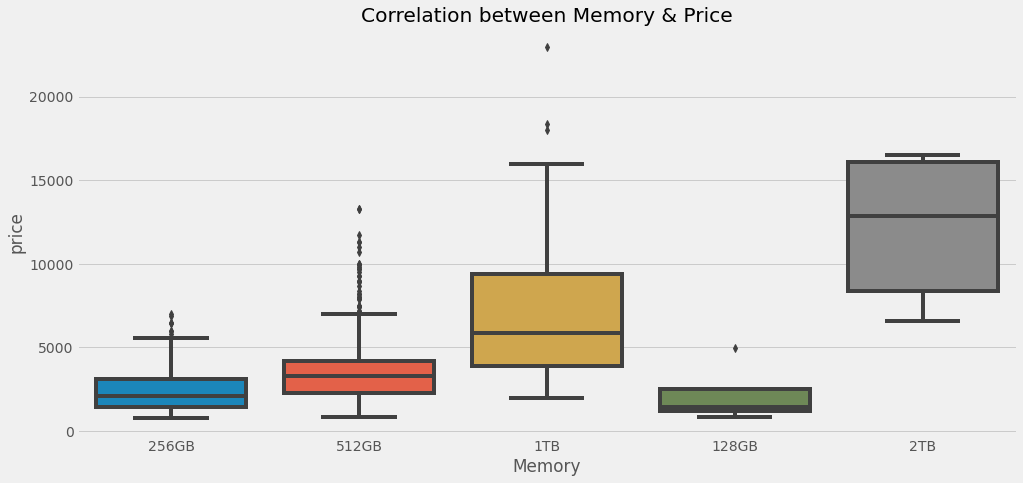

In [142]:
plt.figure(figsize=(15,7))
plt.title('Correlation between Memory & Price')
sns.boxplot(data=df,x='Memory',y='price')
plt.show()

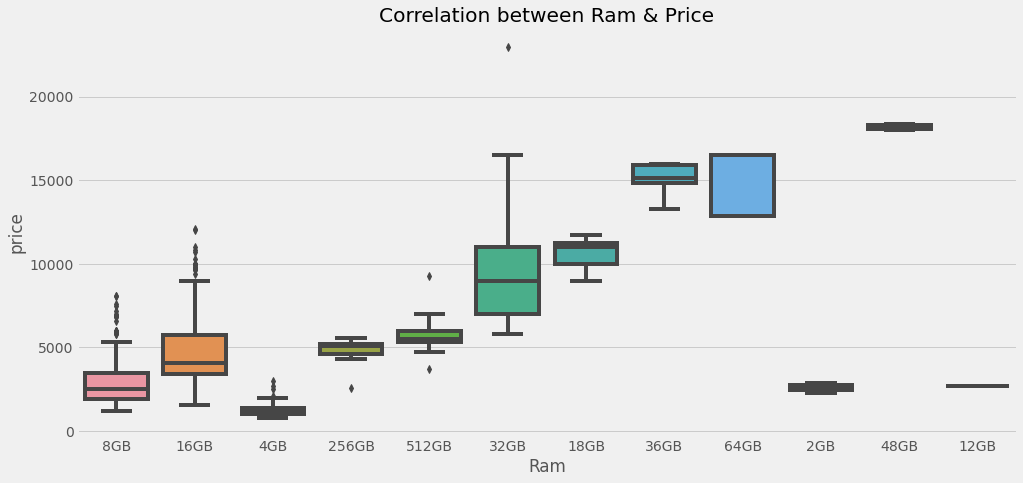

In [143]:
plt.figure(figsize=(15,7))
plt.title('Correlation between Ram & Price')
sns.boxplot(data=df,x='Ram',y='price')
plt.show()

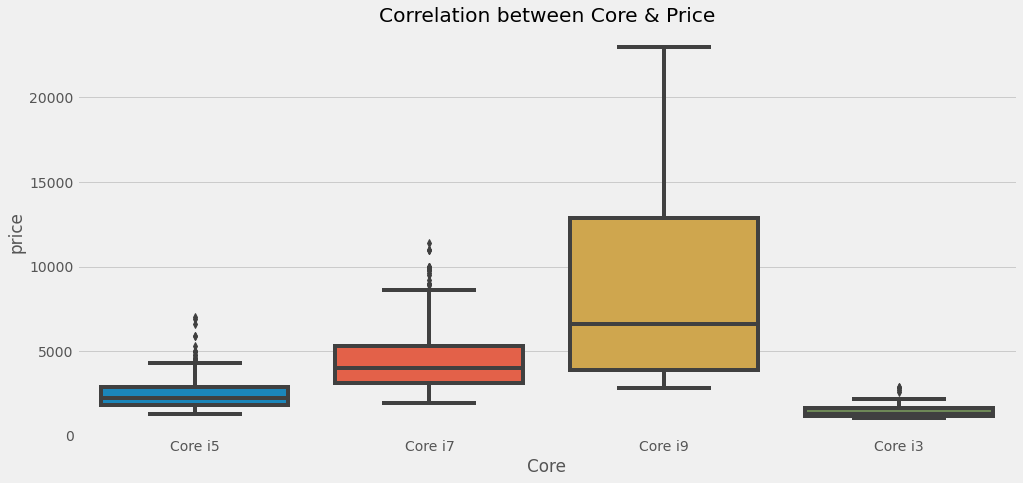

In [144]:
plt.figure(figsize=(15,7))
plt.title('Correlation between Core & Price')
sns.boxplot(data=df,x='Core',y='price')
plt.show()

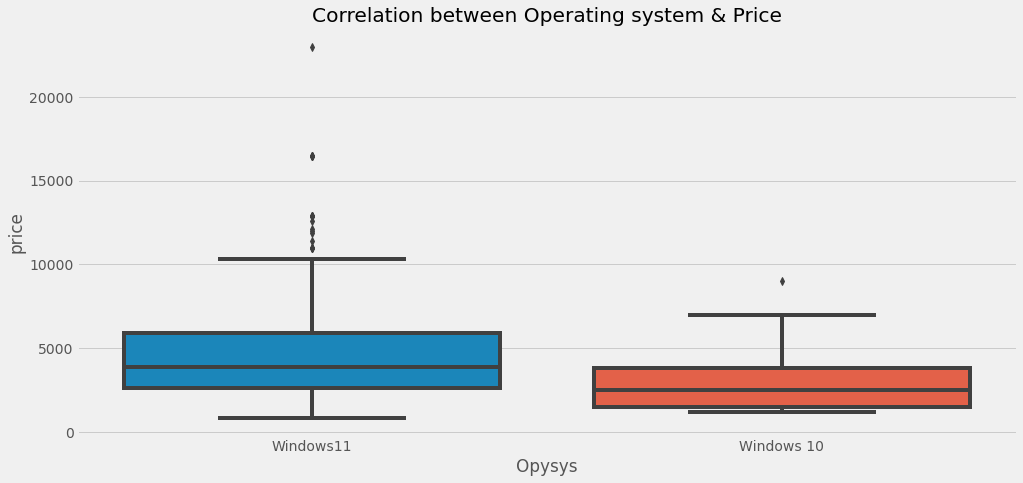

In [147]:
plt.figure(figsize=(15,7))
plt.title('Correlation between Operating system & Price')
sns.boxplot(data=df,x='Opysys',y='price')
plt.show()

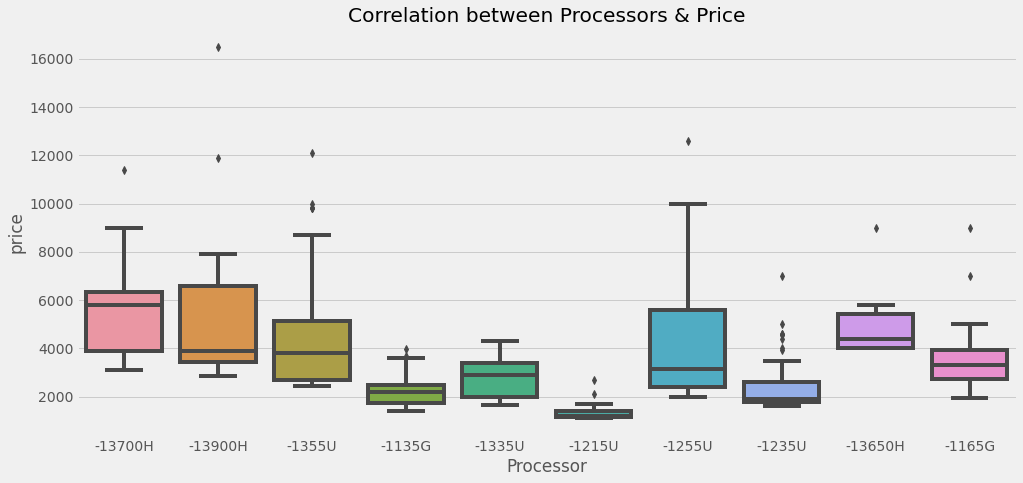

In [151]:
plt.figure(figsize=(15,7))
top_Processor=df['Processor'].value_counts().index[:10]
df_top_processors = df[df['Processor'].isin(top_Processor)]
plt.title('Correlation between Processors & Price')
sns.boxplot(data=df_top_processors,x='Processor',y='price')
plt.show()

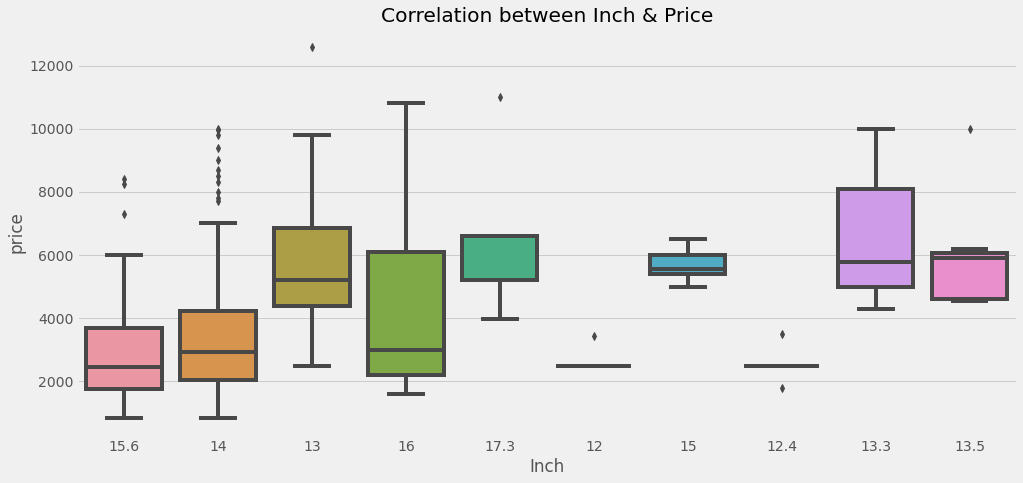

In [154]:
plt.figure(figsize=(15,7))
top_Inch=df['Inch'].value_counts().index[:10]
df_top_Inch = df[df['Inch'].isin(top_Inch)]
plt.title('Correlation between Inch & Price')
sns.boxplot(data=df_top_Inch,x='Inch',y='price')
plt.show()

In [152]:
df.columns

Index(['price', 'Category', 'Inch', 'Core', 'Processor', 'Ram', 'Memory',
       'Opysys'],
      dtype='object')

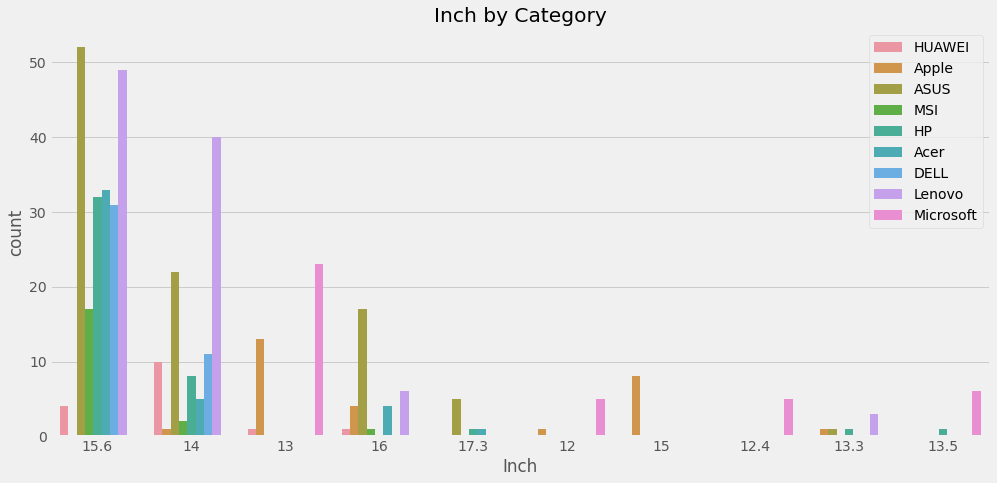

In [157]:
plt.figure(figsize=(15,7))
plt.title(f'Inch by Category')
top_Inch=df['Inch'].value_counts().index[:10]
df_top_Inch = df[df['Inch'].isin(top_Inch)]
sns.countplot(data=df_top_Inch,x='Inch',hue='Category')
plt.legend(loc='upper right')
plt.show()

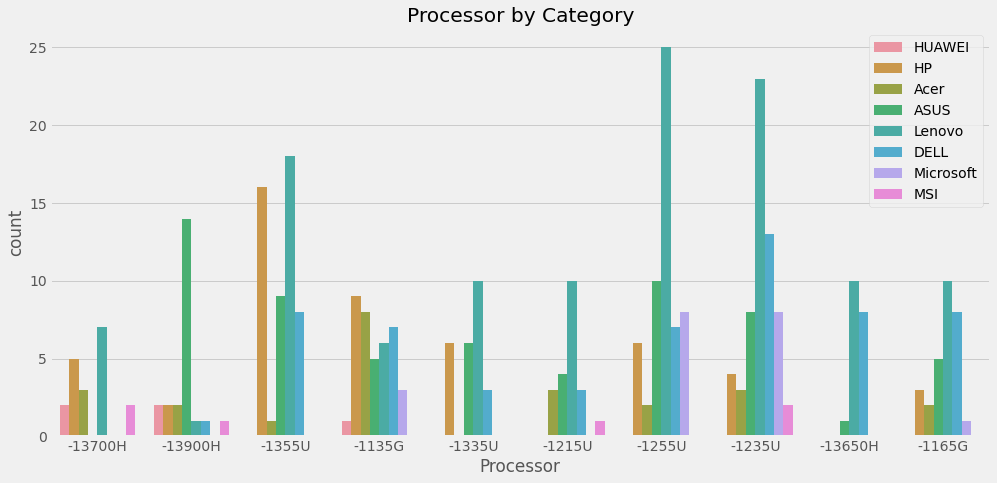

In [159]:
plt.figure(figsize=(15,7))
plt.title(f'Processor by Category')
top_Processor=df['Processor'].value_counts().index[:10]
df_top_Processor = df[df['Processor'].isin(top_Processor)]
sns.countplot(data=df_top_Processor,x='Processor',hue='Category')
plt.legend(loc='upper right')
plt.show()

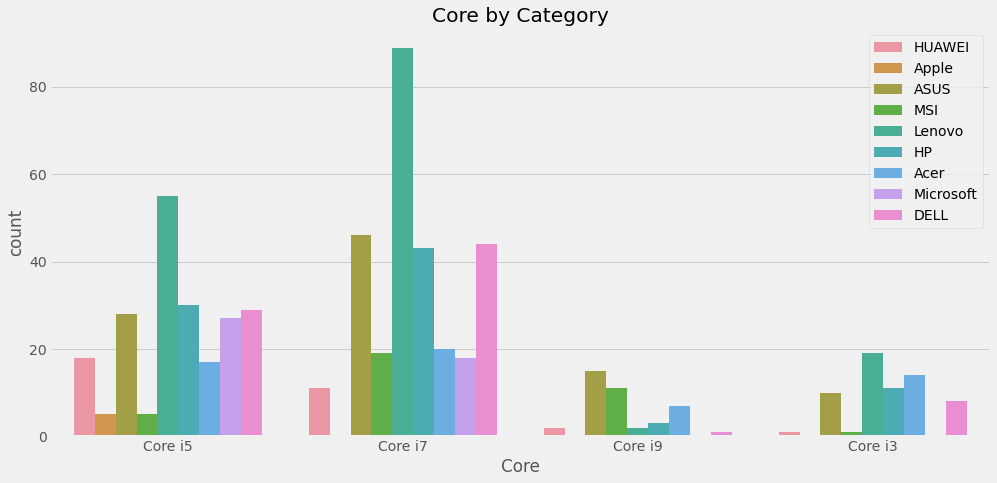

In [160]:
plt.figure(figsize=(15,7))
plt.title(f'Core by Category')
sns.countplot(data=df,x='Core',hue='Category')
plt.legend(loc='upper right')
plt.show()

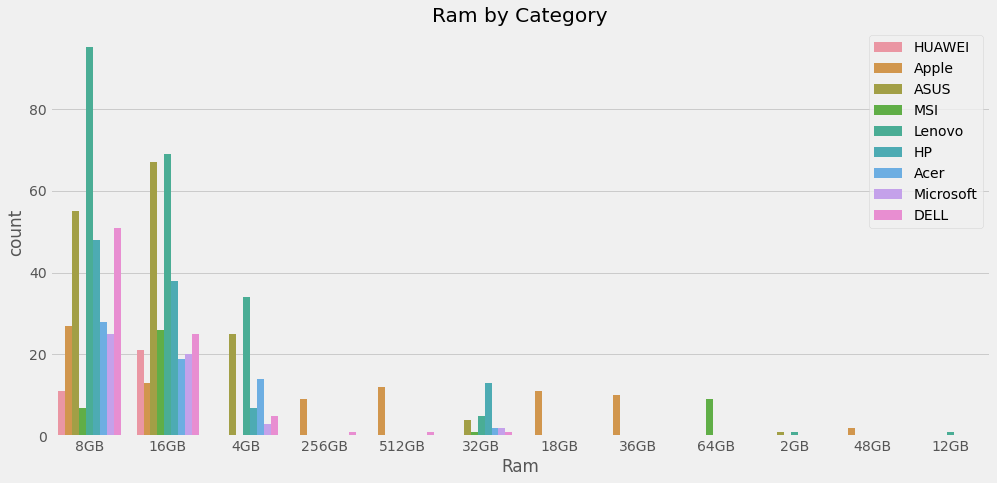

In [161]:
plt.figure(figsize=(15,7))
plt.title(f'Ram by Category')
sns.countplot(data=df,x='Ram',hue='Category')
plt.legend(loc='upper right')
plt.show()

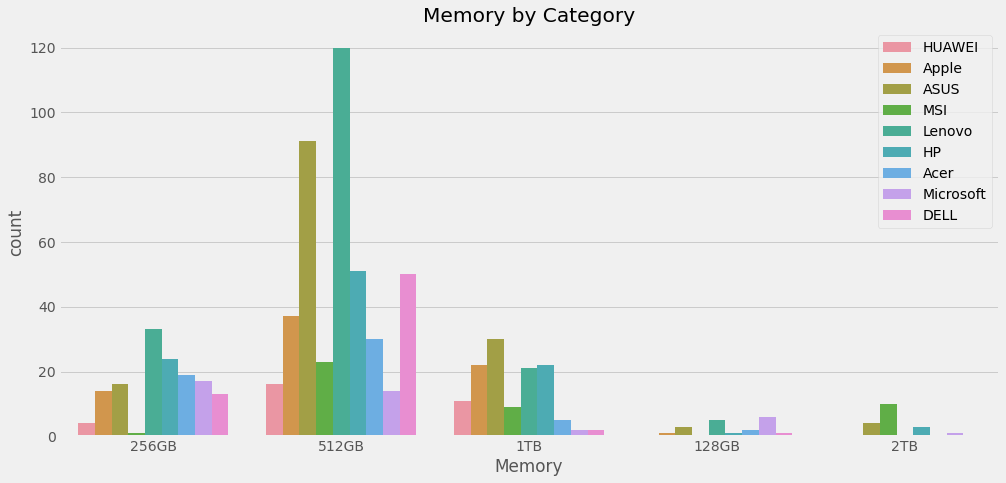

In [162]:
plt.figure(figsize=(15,7))
plt.title(f'Memory by Category')
sns.countplot(data=df,x='Memory',hue='Category')
plt.legend(loc='upper right')
plt.show()

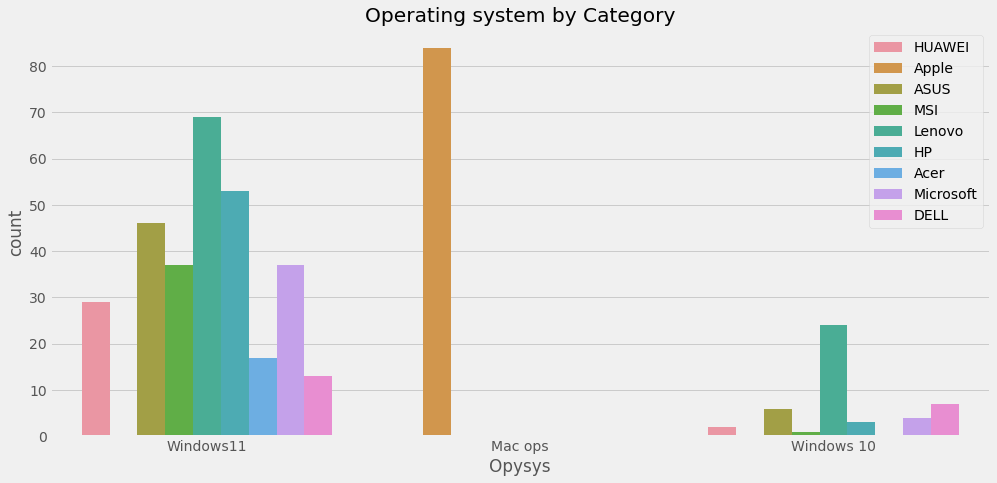

In [176]:
plt.figure(figsize=(15,7))
plt.title(f'Operating system by Category')
sns.countplot(data=df,x='Opysys',hue='Category')
plt.legend(loc='upper right')
plt.show()

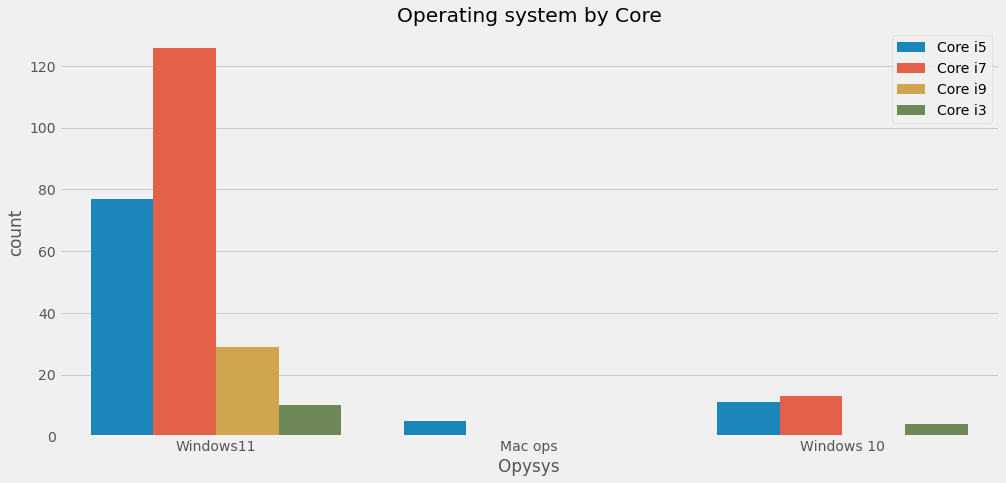

In [177]:
plt.figure(figsize=(15,7))
plt.title(f'Operating system by Core')
sns.countplot(data=df,x='Opysys',hue='Core')
plt.legend(loc='upper right')
plt.show()

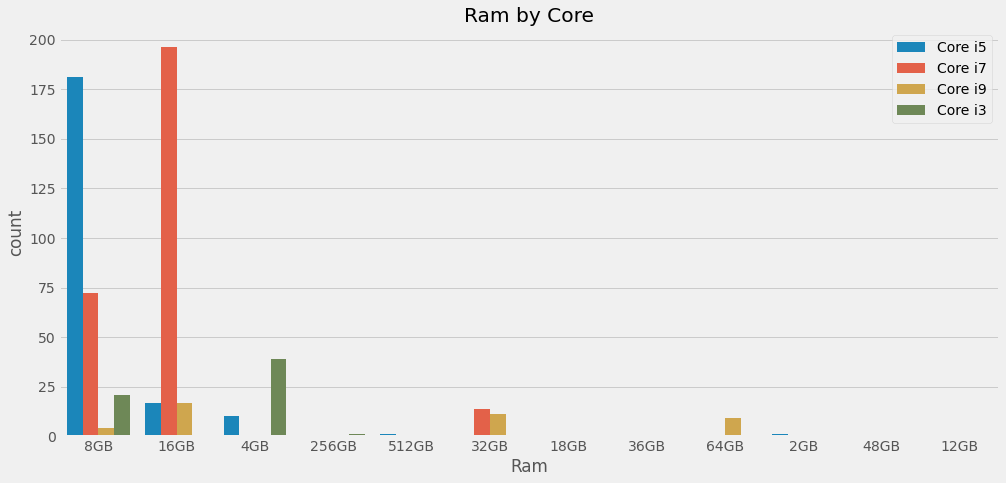

In [178]:
plt.figure(figsize=(15,7))
plt.title(f'Ram by Core')
sns.countplot(data=df,x='Ram',hue='Core')
plt.legend(loc='upper right')
plt.show()

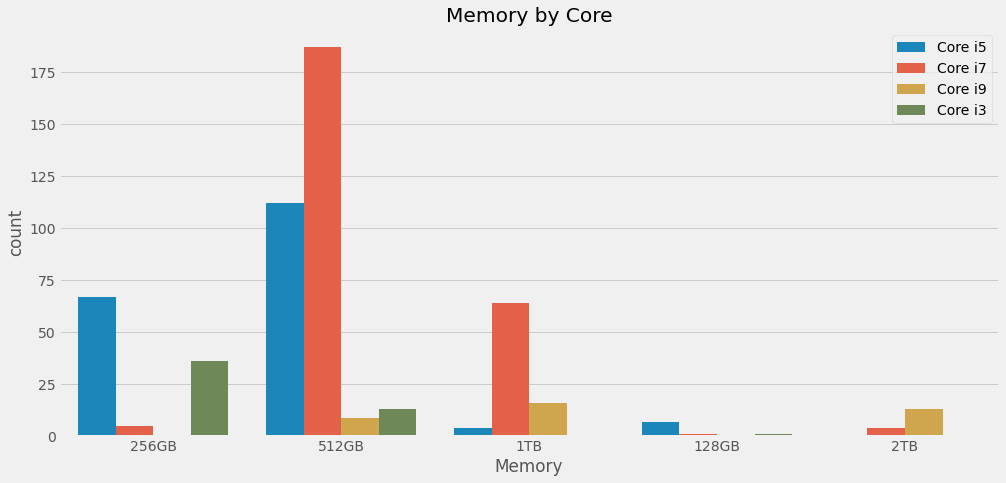

In [179]:
plt.figure(figsize=(15,7))
plt.title(f'Memory by Core')
sns.countplot(data=df,x='Memory',hue='Core')
plt.legend(loc='upper right')
plt.show()

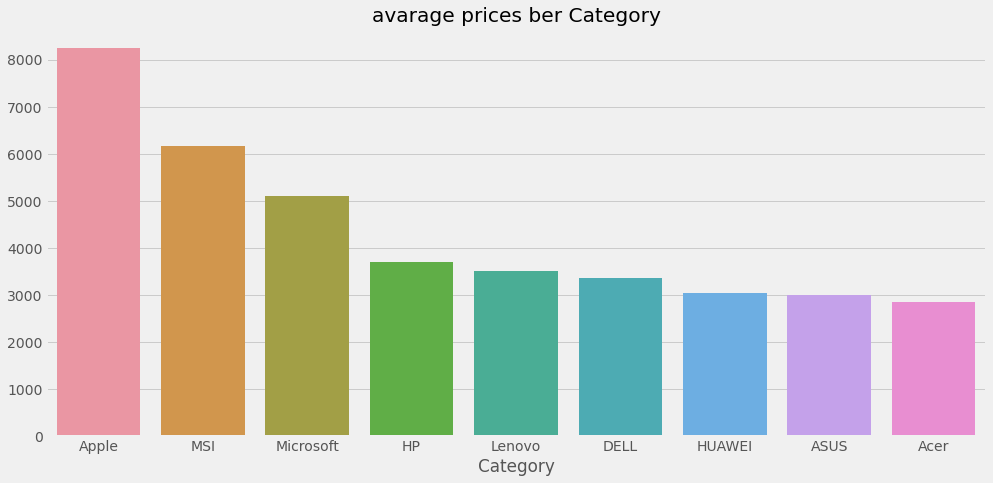

In [188]:
group=df.groupby('Category')['price'].mean()
group=group.sort_values(ascending=False)
plt.figure(figsize=(15,7))
plt.title(f'avarage prices ber Category')
sns.barplot(x=group.index,y=group.values)
plt.show()

## Save The Modefied File

In [189]:
# save cleaned data
df.to_csv('D:\MLdatasets\Modified laptops.csv')